In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
Data = pd.read_csv('Airbnbprediction.csv')
Data

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [3]:

columns_to_drop = [
    'id', 'description', 'first_review', 'host_has_profile_pic', 
    'host_identity_verified', 'host_response_rate', 'host_since', 
    'last_review', 'latitude', 'longitude', 'name', 'number_of_reviews', 
    'review_scores_rating', 'thumbnail_url', 'zipcode'
]


Data.drop(columns=columns_to_drop, inplace=True)

print(Data.head())

   log_price property_type        room_type  \
0   5.010635     Apartment  Entire home/apt   
1   5.129899     Apartment  Entire home/apt   
2   4.976734     Apartment  Entire home/apt   
3   6.620073         House  Entire home/apt   
4   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city instant_bookable  \
0  Real Bed              strict          True  NYC                f   
1  Real Bed              strict          True  NYC                t   
2  Real Bed      

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   log_price            74111 non-null  float64
 1   property_type        74111 non-null  object 
 2   room_type            74111 non-null  object 
 3   amenities            74111 non-null  object 
 4   accommodates         74111 non-null  int64  
 5   bathrooms            73911 non-null  float64
 6   bed_type             74111 non-null  object 
 7   cancellation_policy  74111 non-null  object 
 8   cleaning_fee         74111 non-null  bool   
 9   city                 74111 non-null  object 
 10  instant_bookable     74111 non-null  object 
 11  neighbourhood        67239 non-null  object 
 12  bedrooms             74020 non-null  float64
 13  beds                 73980 non-null  float64
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 7.4+ MB


In [5]:
# Transformer la colonne log_price en une colonne price
Data['price'] = np.exp(Data['log_price'])

# Afficher les premières lignes du DataFrame modifié
print(Data.head())

   log_price property_type        room_type  \
0   5.010635     Apartment  Entire home/apt   
1   5.129899     Apartment  Entire home/apt   
2   4.976734     Apartment  Entire home/apt   
3   6.620073         House  Entire home/apt   
4   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city instant_bookable  \
0  Real Bed              strict          True  NYC                f   
1  Real Bed              strict          True  NYC                t   
2  Real Bed      

In [6]:
# Identifier les lignes où la colonne des commodités contient '{}'
rows_to_drop = Data[Data['amenities'] == '{}'].index

# Supprimer ces lignes du DataFrame
Data.drop(rows_to_drop, inplace=True)

# Afficher les premières lignes du DataFrame modifié
print(Data.head())

   log_price property_type        room_type  \
0   5.010635     Apartment  Entire home/apt   
1   5.129899     Apartment  Entire home/apt   
2   4.976734     Apartment  Entire home/apt   
3   6.620073         House  Entire home/apt   
4   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city instant_bookable  \
0  Real Bed              strict          True  NYC                f   
1  Real Bed              strict          True  NYC                t   
2  Real Bed      

In [7]:
# Compter le nombre de doublons
nombre_doublons = Data.duplicated().sum()
print(f"Nombre de doublons : {nombre_doublons}")

# Supprimer les doublons
Data.drop_duplicates(inplace=True)

# Afficher les premières lignes du DataFrame modifié
print(Data.head())

Nombre de doublons : 249
   log_price property_type        room_type  \
0   5.010635     Apartment  Entire home/apt   
1   5.129899     Apartment  Entire home/apt   
2   4.976734     Apartment  Entire home/apt   
3   6.620073         House  Entire home/apt   
4   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city instant_bookable  \
0  Real Bed              strict          True  NYC                f   
1  Real Bed              strict          True  NYC             

In [8]:
# Filtrer les locations dont le prix est compris entre 20 et 1000 dollars
data_filtered = Data[(Data['price'] >= 20) & (Data['price'] <= 1000)]

# Compter le nombre de samples restants
nombre_samples_restants = data_filtered.shape[0]
print(f"Nombre de samples restants : {nombre_samples_restants}")

Nombre de samples restants : 72473


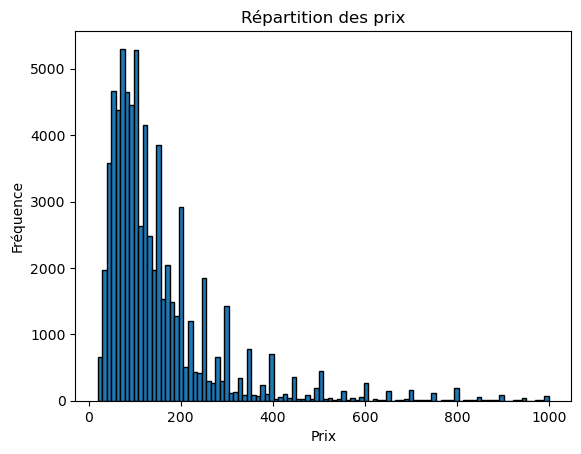

In [9]:
# Afficher la répartition des prix avec un découpage en 100 bacs
plt.hist(data_filtered['price'], bins=100, edgecolor='black')
plt.title('Répartition des prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

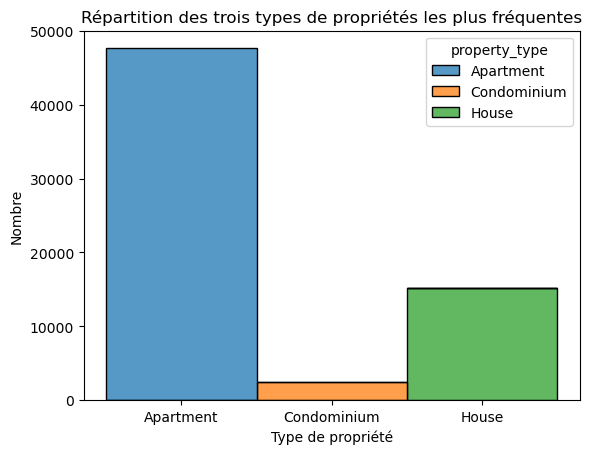

In [10]:
# Filtrer les locations dont le prix est inférieur à 500 dollars
data_filtered = Data[Data['price'] < 500]

# Identifier les trois types de propriétés les plus fréquentes
top_properties = data_filtered['property_type'].value_counts().nlargest(3).index

# Filtrer le DataFrame pour ne conserver que ces trois types de propriétés
data_top_properties = data_filtered[data_filtered['property_type'].isin(top_properties)]

# Afficher la répartition de ces trois types de propriétés via un histplot
sns.histplot(data=data_top_properties, x='property_type', hue='property_type', multiple='stack')
plt.title('Répartition des trois types de propriétés les plus fréquentes')
plt.xlabel('Type de propriété')
plt.ylabel('Nombre')
plt.show()

In [11]:
# Calculer la valeur moyenne des prix pour chaque type de propriété parmi les trois types les plus fréquents
mean_prices = data_top_properties.groupby('property_type')['price'].mean()

# Afficher les valeurs moyennes
print(mean_prices)

# Analyser les différences apparentes
for property_type, mean_price in mean_prices.items():
    print(f"Type de propriété: {property_type}, Prix moyen: {mean_price:.2f}")

property_type
Apartment      133.883819
Condominium    168.761523
House          138.414695
Name: price, dtype: float64
Type de propriété: Apartment, Prix moyen: 133.88
Type de propriété: Condominium, Prix moyen: 168.76
Type de propriété: House, Prix moyen: 138.41


En observant les valeurs moyennes des prix pour chaque type de propriété, on peut constater des différences apparentes. Ces différences peuvent s'expliquer par plusieurs facteurs :

Localisation : Certaines propriétés peuvent être situées dans des zones plus prisées, ce qui augmente leur prix.
Taille et équipements : Les propriétés plus grandes ou mieux équipées peuvent avoir des prix plus élevés.
Demande et offre : La popularité de certains types de propriétés peut influencer leur prix moyen.

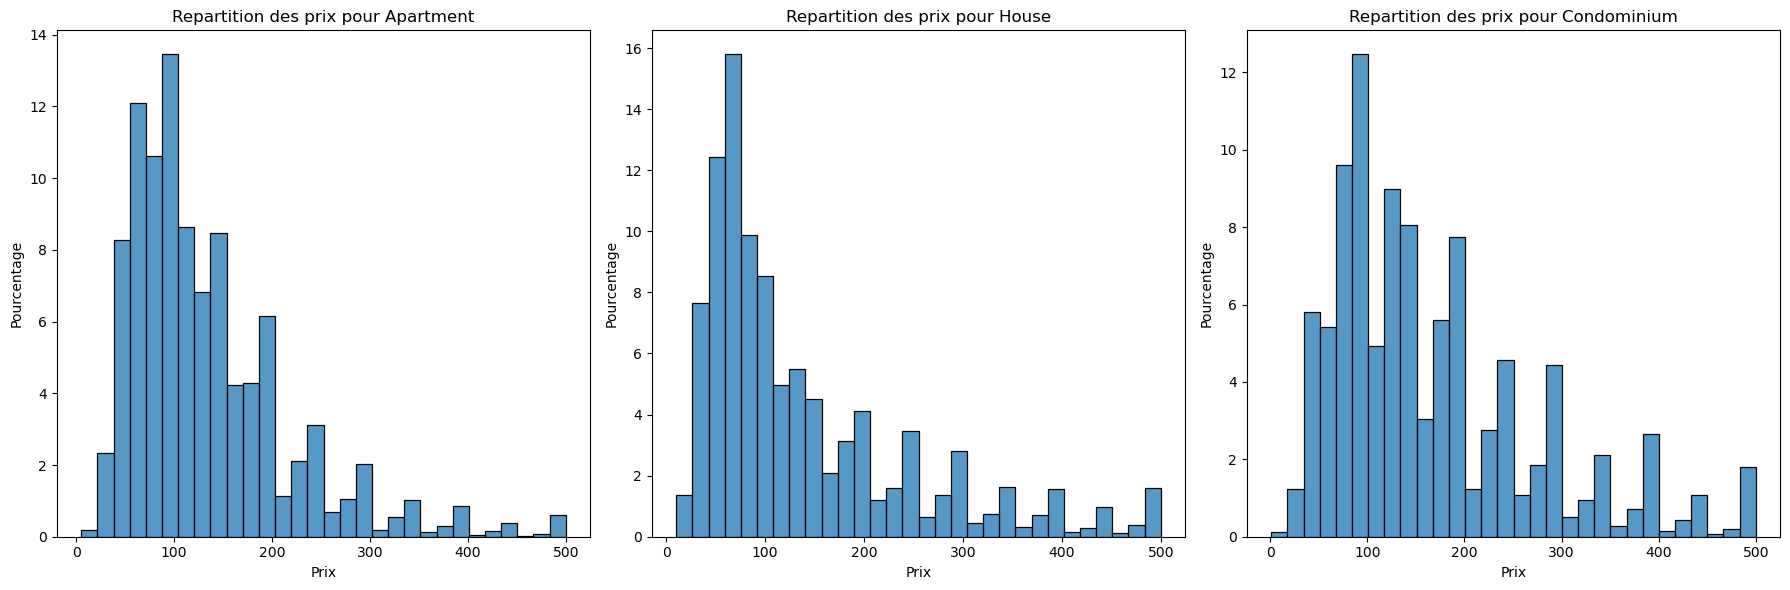

In [12]:
# Créer des DataFrames séparés pour chaque type de propriété
data_property_1 = data_filtered[data_filtered['property_type'] == top_properties[0]]
data_property_2 = data_filtered[data_filtered['property_type'] == top_properties[1]]
data_property_3 = data_filtered[data_filtered['property_type'] == top_properties[2]]

# Afficher trois histplots, un pour chaque type de propriété, avec l'option stat='percent'
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(data_property_1['price'], bins=30, stat='percent', edgecolor='black')
plt.title(f'Repartition des prix pour {top_properties[0]}')
plt.xlabel('Prix')
plt.ylabel('Pourcentage')

plt.subplot(1, 3, 2)
sns.histplot(data_property_2['price'], bins=30, stat='percent', edgecolor='black')
plt.title(f'Repartition des prix pour {top_properties[1]}')
plt.xlabel('Prix')
plt.ylabel('Pourcentage')

plt.subplot(1, 3, 3)
sns.histplot(data_property_3['price'], bins=30, stat='percent', edgecolor='black')
plt.title(f'Repartition des prix pour {top_properties[2]}')
plt.xlabel('Prix')
plt.ylabel('Pourcentage')

plt.tight_layout()
plt.show()

Lorsque l'on se concentre uniquement sur la valeur moyenne des prix, plusieurs aspects importants peuvent être négligés :

Distribution des Données : La moyenne ne donne pas d'information sur la distribution des prix. Par exemple, deux types de propriétés peuvent avoir la même moyenne mais des distributions très différentes (une avec des prix très concentrés autour de la moyenne et l'autre avec des prix très dispersés).

Présence de Valeurs Extrêmes : Les moyennes peuvent être fortement influencées par des valeurs extrêmes (outliers). Une propriété très chère peut augmenter la moyenne de manière significative, même si la plupart des propriétés sont moins chères.

Variabilité : La moyenne ne reflète pas la variabilité des prix. Deux types de propriétés peuvent avoir la même moyenne mais des écarts-types très différents, indiquant des niveaux de variabilité différents.

Représentativité : La moyenne peut ne pas être représentative de la majorité des données. Par exemple, si la distribution est asymétrique, la médiane pourrait être une mesure plus représentative.

EXO 2

In [13]:
# Identifier les colonnes de type objet
object_columns = Data.select_dtypes(include=['object']).columns.tolist()

# Afficher le nombre de valeurs différentes pour chaque colonne de type objet
for column in object_columns:
    unique_values_count = Data[column].nunique()
    print(f"Feature: {column}, Nombre de valeurs différentes: {unique_values_count}")

Feature: property_type, Nombre de valeurs différentes: 34
Feature: room_type, Nombre de valeurs différentes: 3
Feature: amenities, Nombre de valeurs différentes: 67121
Feature: bed_type, Nombre de valeurs différentes: 5
Feature: cancellation_policy, Nombre de valeurs différentes: 5
Feature: city, Nombre de valeurs différentes: 6
Feature: instant_bookable, Nombre de valeurs différentes: 2
Feature: neighbourhood, Nombre de valeurs différentes: 619


In [14]:
# Compter le nombre de samples avec la valeur 't' ou 'f' dans la colonne instant_bookable
count_t = Data[Data['instant_bookable'] == 't'].shape[0]
count_f = Data[Data['instant_bookable'] == 'f'].shape[0]

# Calculer le prix moyen des locations pour chaque catégorie ('t' et 'f')
mean_price_t = Data[Data['instant_bookable'] == 't']['price'].mean()
mean_price_f = Data[Data['instant_bookable'] == 'f']['price'].mean()

# Afficher les résultats
print(f"Nombre de samples avec 't' dans instant_bookable: {count_t}")
print(f"Prix moyen des locations avec 't': {mean_price_t:.2f}")

print(f"Nombre de samples avec 'f' dans instant_bookable: {count_f}")
print(f"Prix moyen des locations avec 'f': {mean_price_f:.2f}")

Nombre de samples avec 't' dans instant_bookable: 19270
Prix moyen des locations avec 't': 153.13
Nombre de samples avec 'f' dans instant_bookable: 54006
Prix moyen des locations avec 'f': 162.94


In [15]:
# Vérifier s'il y a des données manquantes dans la colonne instant_bookable
missing_values = Data['instant_bookable'].isnull().sum()

# Afficher le résultat
print(f"Nombre de valeurs manquantes dans instant_bookable: {missing_values}")

Nombre de valeurs manquantes dans instant_bookable: 0


NON

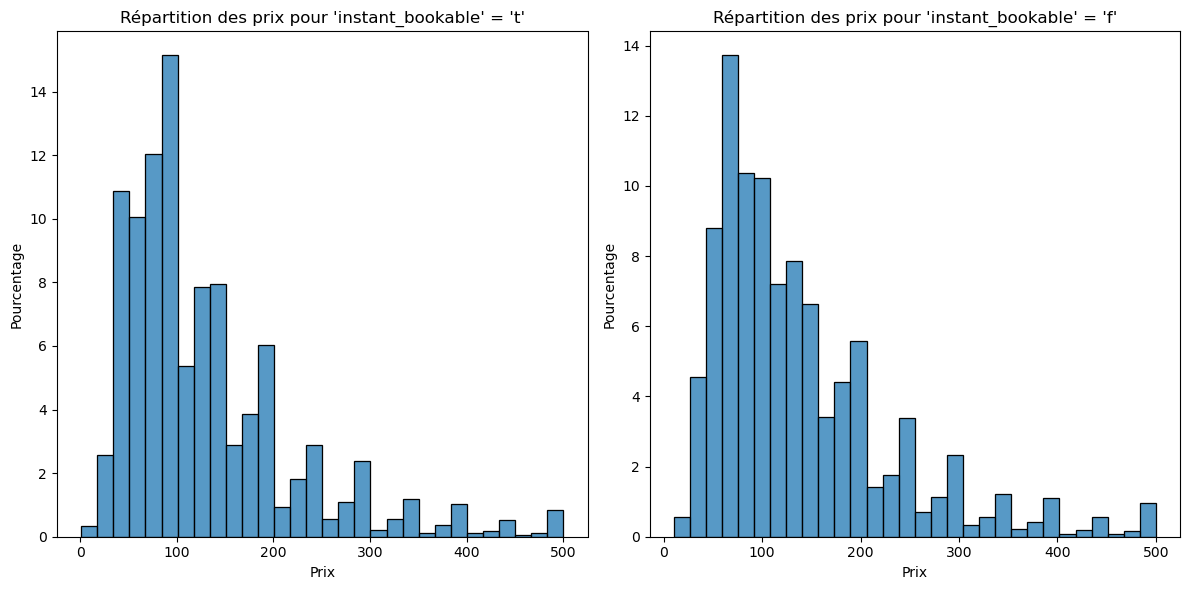

In [16]:
# Utiliser la fonction groupby pour créer des DataFrames pour chaque catégorie de instant_bookable
grouped = data_filtered.groupby('instant_bookable')

# Récupérer les DataFrames pour chaque catégorie
data_instant_bookable_t = grouped.get_group('t')
data_instant_bookable_f = grouped.get_group('f')

# Afficher la répartition des prix de chacune des catégories via un histogramme normalisé
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_instant_bookable_t['price'], bins=30, stat='percent', edgecolor='black')
plt.title("Répartition des prix pour 'instant_bookable' = 't'")
plt.xlabel('Prix')
plt.ylabel('Pourcentage')

plt.subplot(1, 2, 2)
sns.histplot(data_instant_bookable_f['price'], bins=30, stat='percent', edgecolor='black')
plt.title("Répartition des prix pour 'instant_bookable' = 'f'")
plt.xlabel('Prix')
plt.ylabel('Pourcentage')

plt.tight_layout()
plt.show()

NON

EXO 3

In [17]:
# Calculer le nombre et la moyenne des prix pour chaque type de chambre (room_type)
room_type_stats = data_filtered.groupby('room_type')['price'].agg(['count', 'mean'])

# Afficher les résultats
print(room_type_stats)

# Analyser les résultats
for room_type, stats in room_type_stats.iterrows():
    print(f"Type de chambre: {room_type}, Nombre: {stats['count']}, Prix moyen: {stats['mean']:.2f}")

                 count        mean
room_type                         
Entire home/apt  38791  181.167230
Private room     30040   84.128728
Shared room       2035   58.179853
Type de chambre: Entire home/apt, Nombre: 38791.0, Prix moyen: 181.17
Type de chambre: Private room, Nombre: 30040.0, Prix moyen: 84.13
Type de chambre: Shared room, Nombre: 2035.0, Prix moyen: 58.18


Les prix moyens ont une assez grandes différences, il en est de meme pour leurs nombres ce qui va probablement influencer le poid de son information sur l'ensemble du dataframe.

Une seule colonne suffit.

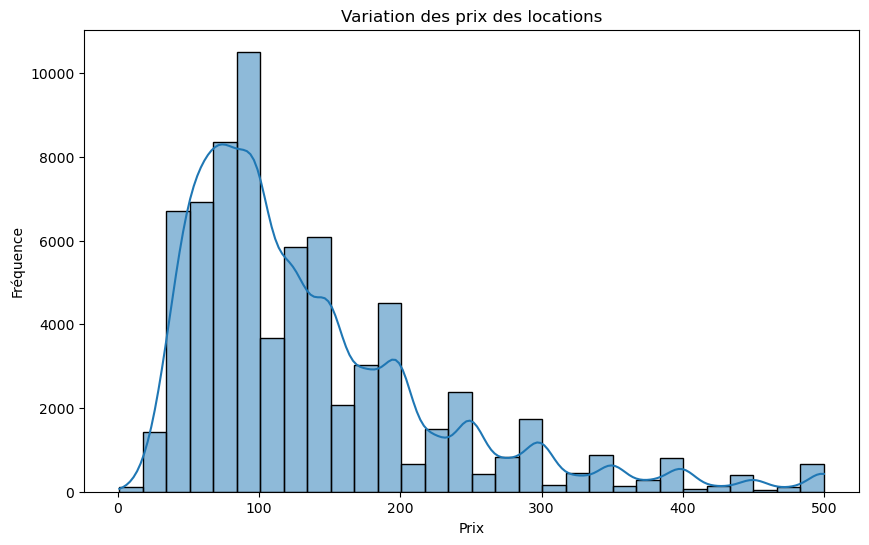

In [18]:
# Afficher la variation des prix des locations avec la fonction histplot
plt.figure(figsize=(10, 6))
sns.histplot(data_filtered['price'], bins=30, edgecolor='black', kde=True)
plt.title('Variation des prix des locations')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

L'encodage One-Hot crée des colonnes binaires pour chaque type de chambre, ce qui permet de représenter les catégories de manière non ordonnée et évite les problèmes liés à l'utilisation de la norme euclidienne pour comparer les samples. Cette méthode est généralement la meilleure pour les algorithmes d'apprentissage automatique.

EXO 4

In [19]:
# Utiliser la fonction groupby et aggregate pour calculer le nombre et le prix moyen de chaque type de propriété
property_type_stats = data_filtered.groupby('property_type')['price'].aggregate(['count', 'mean'])

# Trier les résultats par ordre croissant du nombre de chaque propriété
property_type_stats_sorted = property_type_stats.sort_values(by='count')

# Calculer le nombre de types de propriétés distincts
num_property_types = data_filtered['property_type'].nunique()

# Afficher le nombre de types de propriétés
print(f"Nombre de types de propriétés distincts : {num_property_types}")

# Afficher les résultats
print(property_type_stats_sorted)

Nombre de types de propriétés distincts : 34
                    count        mean
property_type                        
Casa particular         1   80.000000
Lighthouse              1  250.000000
Island                  1  150.000000
Train                   2  182.500000
Cave                    2  136.000000
Tipi                    3  232.333333
Earth House             3  141.666667
Chalet                  5  138.000000
Treehouse               6  125.666667
Hut                     8   63.625000
Yurt                    9  163.444444
Vacation home          10  233.200000
Castle                 12  216.166667
Tent                   16   75.875000
Serviced apartment     20  175.350000
Boat                   56  182.928571
Hostel                 62   59.161290
Boutique hotel         64  159.515625
Timeshare              65  250.707692
In-law                 71  135.929577
Cabin                  71  116.971831
Camper/RV              90  127.255556
Guest suite           121  124.561983
Dorm 

In [20]:
# Identifier les types de propriétés ayant un prix moyen supérieur à 200 dollars
high_price_properties = property_type_stats[property_type_stats['mean'] > 200].index.tolist()

# Transformer les valeurs de ces types de propriétés en "Timeshare" en utilisant .loc
data_filtered.loc[data_filtered['property_type'].isin(high_price_properties), 'property_type'] = 'Timeshare'

# Afficher les premières lignes du DataFrame pour vérifier les transformations
print(data_filtered.head())

   log_price property_type        room_type  \
0   5.010635     Apartment  Entire home/apt   
1   5.129899     Apartment  Entire home/apt   
2   4.976734     Apartment  Entire home/apt   
4   4.744932     Apartment  Entire home/apt   
5   4.442651     Apartment     Private room   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   
5  {TV,"Wireless Internet",Heating,"Smoke detecto...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city instant_bookable  \
0  Real Bed              strict          True  NYC                f   
1  Real Bed              strict          True  NYC                t   
2  Real Bed      

In [21]:
# Utiliser la fonction groupby et aggregate pour calculer le nombre de chaque type de propriété
property_type_counts = data_filtered['property_type'].value_counts()

# Identifier les types de propriétés ayant moins de 20 valeurs
low_count_properties = property_type_counts[property_type_counts < 20].index.tolist()

# Supprimer les lignes correspondant à ces types de propriétés du DataFrame
data_filtered = data_filtered[~data_filtered['property_type'].isin(low_count_properties)]

# Afficher les premières lignes du DataFrame pour vérifier les suppressions
print(data_filtered.head())

   log_price property_type        room_type  \
0   5.010635     Apartment  Entire home/apt   
1   5.129899     Apartment  Entire home/apt   
2   4.976734     Apartment  Entire home/apt   
4   4.744932     Apartment  Entire home/apt   
5   4.442651     Apartment     Private room   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   
5  {TV,"Wireless Internet",Heating,"Smoke detecto...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city instant_bookable  \
0  Real Bed              strict          True  NYC                f   
1  Real Bed              strict          True  NYC                t   
2  Real Bed      

EXO 5

In [22]:
# Utiliser la fonction groupby et aggregate pour calculer le nombre de locations et le prix moyen pour chaque type de lit (bed_type)
bed_type_stats = data_filtered.groupby('bed_type')['price'].aggregate(['count', 'mean'])

# Afficher les résultats
print(bed_type_stats)

# Analyser les résultats
for bed_type, stats in bed_type_stats.iterrows():
    print(f"Type de lit: {bed_type}, Nombre de locations: {stats['count']}, Prix moyen: {stats['mean']:.2f}")

               count        mean
bed_type                        
Airbed           453   85.061810
Couch            255   81.384314
Futon            735   86.617687
Pull-out Sofa    580  100.653448
Real Bed       68790  137.898270
Type de lit: Airbed, Nombre de locations: 453.0, Prix moyen: 85.06
Type de lit: Couch, Nombre de locations: 255.0, Prix moyen: 81.38
Type de lit: Futon, Nombre de locations: 735.0, Prix moyen: 86.62
Type de lit: Pull-out Sofa, Nombre de locations: 580.0, Prix moyen: 100.65
Type de lit: Real Bed, Nombre de locations: 68790.0, Prix moyen: 137.90


La majoritée des lits sont des real bed et ont une valeur supérieur aux autres.

In [23]:
# Utiliser la fonction groupby sur les deux features property_type et bed_type pour calculer le prix moyen
price_means = data_filtered.groupby(['property_type', 'bed_type'])['price'].mean().reset_index()

# Utiliser la fonction pivot pour réorganiser le DataFrame
price_means_pivot = price_means.pivot(index='property_type', columns='bed_type', values='price')

# Afficher le DataFrame pivoté pour une lecture plus simple
print(price_means_pivot)

bed_type                Airbed       Couch       Futon  Pull-out Sofa  \
property_type                                                           
Apartment            82.023188   78.062827   83.690229      98.951923   
Bed & Breakfast      55.000000   51.666667   80.857143      41.000000   
Boat                       NaN         NaN         NaN            NaN   
Boutique hotel             NaN         NaN         NaN            NaN   
Bungalow            108.000000   99.000000  101.125000      91.250000   
Cabin                      NaN         NaN  112.800000      80.000000   
Camper/RV                  NaN         NaN  108.666667      62.000000   
Condominium         113.208333   92.538462  110.809524     112.291667   
Dorm                       NaN         NaN  270.500000            NaN   
Guest suite                NaN         NaN         NaN      89.500000   
Guesthouse                 NaN         NaN   79.000000     103.333333   
Hostel                     NaN         NaN         

In [24]:
# Utiliser la fonction groupby sur les deux features property_type et bed_type pour calculer le nombre de locations
location_counts = data_filtered.groupby(['property_type', 'bed_type'])['price'].count().reset_index()

# Renommer la colonne 'price' en 'count' pour refléter le nombre de locations
location_counts.rename(columns={'price': 'count'}, inplace=True)

# Utiliser la fonction pivot pour réorganiser le DataFrame
location_counts_pivot = location_counts.pivot(index='property_type', columns='bed_type', values='count')

# Afficher le DataFrame pivoté pour une lecture plus simple
print(location_counts_pivot)

bed_type            Airbed  Couch  Futon  Pull-out Sofa  Real Bed
property_type                                                    
Apartment            345.0  191.0  481.0          416.0   46208.0
Bed & Breakfast        2.0    3.0    7.0            3.0     422.0
Boat                   NaN    NaN    NaN            NaN      56.0
Boutique hotel         NaN    NaN    NaN            NaN      64.0
Bungalow               1.0    1.0    8.0            4.0     349.0
Cabin                  NaN    NaN    5.0            1.0      65.0
Camper/RV              NaN    NaN    3.0            2.0      85.0
Condominium           24.0   13.0   21.0           24.0    2413.0
Dorm                   NaN    NaN    2.0            NaN     130.0
Guest suite            NaN    NaN    NaN            2.0     119.0
Guesthouse             NaN    NaN    1.0            6.0     487.0
Hostel                 NaN    NaN    NaN            NaN      62.0
House                 58.0   27.0  154.0           92.0   14844.0
In-law    

Ils ne semblent pas avoir un impact conséquent sur le dataframe par contre la feature house a pour nombre 14 844 ce qui est le deuxième plus grand nombre après la feature appartement.

In [25]:
# Utiliser l'encodage One-Hot pour numériser les types de lits
data_encoded = pd.get_dummies(data_filtered, columns=['bed_type'])

# Afficher les premières lignes du DataFrame pour vérifier l'encodage
print(data_encoded.head())


   log_price property_type        room_type  \
0   5.010635     Apartment  Entire home/apt   
1   5.129899     Apartment  Entire home/apt   
2   4.976734     Apartment  Entire home/apt   
4   4.744932     Apartment  Entire home/apt   
5   4.442651     Apartment     Private room   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   
5  {TV,"Wireless Internet",Heating,"Smoke detecto...             2        1.0   

  cancellation_policy  cleaning_fee city instant_bookable     neighbourhood  \
0              strict          True  NYC                f  Brooklyn Heights   
1              strict          True  NYC                t    Hell's Kitc

EXO 6

In [26]:
# Utiliser la fonction groupby sur la feature accommodates pour calculer le nombre de locations et le prix moyen
accommodates_stats = data_filtered.groupby('accommodates')['price'].aggregate(['count', 'mean'])

# Afficher les résultats
print(accommodates_stats)

# Analyser les résultats
for accommodates, stats in accommodates_stats.iterrows():
    print(f"Capacité d'accueil: {accommodates}, Nombre de locations: {stats['count']}, Prix moyen: {stats['mean']:.2f}")

              count        mean
accommodates                   
1              9173   74.500818
2             31255  107.644377
3              7635  135.848592
4             11623  170.933408
5              3238  199.121062
6              4436  229.907800
7               826  246.259080
8              1415  267.479152
9               226  280.314159
10              482  279.280083
11               58  281.517241
12              154  306.396104
13               30  323.700000
14               65  295.723077
15               33  288.515152
16              164  299.500000
Capacité d'accueil: 1, Nombre de locations: 9173.0, Prix moyen: 74.50
Capacité d'accueil: 2, Nombre de locations: 31255.0, Prix moyen: 107.64
Capacité d'accueil: 3, Nombre de locations: 7635.0, Prix moyen: 135.85
Capacité d'accueil: 4, Nombre de locations: 11623.0, Prix moyen: 170.93
Capacité d'accueil: 5, Nombre de locations: 3238.0, Prix moyen: 199.12
Capacité d'accueil: 6, Nombre de locations: 4436.0, Prix moyen: 229.

In [27]:
# Filtrer les locations où le nombre de salles de bains est égal à 8
data_bathrooms_8 = data_filtered[data_filtered['bathrooms'] == 8]

# Utiliser la fonction groupby sur la feature accommodates pour calculer le nombre de locations et le prix moyen
accommodates_stats_bathrooms_8 = data_bathrooms_8.groupby('accommodates')['price'].aggregate(['count', 'mean'])

# Afficher les résultats
print(accommodates_stats_bathrooms_8)

# Analyser les résultats
for accommodates, stats in accommodates_stats_bathrooms_8.iterrows():
    print(f"Capacité d'accueil: {accommodates}, Nombre de locations: {stats['count']}, Prix moyen: {stats['mean']:.2f}")

              count       mean
accommodates                  
1                13  44.769231
2                 6  79.000000
4                 6  32.833333
6                 1  46.000000
10                1  27.000000
12                1  33.000000
Capacité d'accueil: 1, Nombre de locations: 13.0, Prix moyen: 44.77
Capacité d'accueil: 2, Nombre de locations: 6.0, Prix moyen: 79.00
Capacité d'accueil: 4, Nombre de locations: 6.0, Prix moyen: 32.83
Capacité d'accueil: 6, Nombre de locations: 1.0, Prix moyen: 46.00
Capacité d'accueil: 10, Nombre de locations: 1.0, Prix moyen: 27.00
Capacité d'accueil: 12, Nombre de locations: 1.0, Prix moyen: 33.00


Capacité d'Accueil :

Les logements avec une capacité d'accueil de 1 à 2 personnes ont des prix moyens plus élevés (44.77 et 79.00 dollars respectivement).
Les logements avec une capacité d'accueil plus élevée (4 à 12 personnes) ont des prix moyens plus bas (27.00 à 46.00 dollars).
Rareté et Anomalies :

Le nombre de locations avec 8 salles de bains est très faible (seulement 28 en total), ce qui peut indiquer des anomalies ou des erreurs dans les données.
Les prix moyens bas peuvent être dus à des erreurs de saisie ou à des logements atypiques qui ne correspondent pas aux attentes pour des logements avec autant de salles de bains.
Qualité des Données :

Il est possible que les données contiennent des erreurs ou des valeurs aberrantes qui faussent les résultats.
Une vérification plus approfondie des données pourrait être nécessaire pour s'assurer de leur qualité et de leur précision.

Encodage en fonction des prix moyens des locations est souvent plus judicieux pour des tâches de prédiction de prix, car il capture directement la valeur économique de chaque catégorie et réduit la variabilité au sein des catégories.